In [17]:
import os
import time
import uuid
import cv2
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import albumentations as alb

### Collect imags using OpenCV

In [27]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 10

In [29]:
# Initialize video capture object for webcam
cap = cv2.VideoCapture(0)

# Specify the number of images to capture
number_images = 20

# Create a directory to save the images
IMAGES_PATH = 'data\images'
os.makedirs(IMAGES_PATH, exist_ok=True)

# Loop to capture the specified number of images
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))  # Print current image number

    # Read a frame from the webcam
    ret, frame = cap.read()

    # Check if the frame is valid
    if not ret:
        print("Failed to capture frame from the webcam")
        continue

    # Generate a unique image filename
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')

    # Save the captured frame as a JPEG image file
    cv2.imwrite(imgname, frame)

    # Display the captured frame in a window
    cv2.imshow('frame', frame)

    # Pause for 0.5 seconds
    time.sleep(0.5)

    # Check if the 'q' key is pressed to quit capturing
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()

# Close all the display windows
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [25]:
%pip install labelme

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Annotate Images with LabelMe
!labelme

###  Review Dataset and Build Image Loading Function

##### 2.1 Import TF and Deps

In [29]:
# %pip install tensorflow
# %pip insyall json

  Using cached tensorflow-2.12.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp38-cp38-win_amd64.whl (272.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-3.8.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached jax-0.4.10-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.54.2-cp38-cp38-win_amd64.whl (4.1 MB)
  Using cached ml_dtypes-0.1.0-cp38-cp38-win_amd64.whl (120 kB)
  Using cached google_auth-2.18.1-py2.py3-none-any.whl (178 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached requests-2.30.0-py3-none-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "insyall" - maybe you meant "install"



In [30]:
%pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


### Limit GPU Memory Growth (If you have GPu)

In [4]:
# List the available physical GPU devices
gpus = tf.config.experimental.list_physical_devices('GPU')

# Set memory growth for each GPU device
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# List the updated physical GPU devices
updated_gpus = tf.config.list_physical_devices('GPU')
print(updated_gpus)

[]


###  Load Image into TF Data Pipeline

In [5]:
### Load Image into TF Data Pipeline

# Create a dataset of image file paths
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=True)

# Get the next element from the dataset as a numpy array
next_image = images.as_numpy_iterator().next()

# Print the next image file path
print(next_image)

b'data\\images\\50a5d3bf-f536-11ed-84f3-9c2f9d6122a8.jpg'


In [6]:
def load_image(x):
    # Read the image file as bytes
    byte_img = tf.io.read_file(x)

    # Decode the JPEG image from bytes to a tensor
    img = tf.io.decode_jpeg(byte_img)

    # Return the decoded image tensor
    return img

In [7]:
# Apply the 'load_image' function to the dataset
images = images.map(load_image)

In [8]:
# Get the next element from the dataset as a numpy array
images.as_numpy_iterator().next()

array([[[119, 153, 152],
        [122, 154, 153],
        [126, 156, 156],
        ...,
        [183, 160, 168],
        [182, 156, 165],
        [179, 152, 161]],

       [[124, 154, 156],
        [125, 155, 155],
        [131, 157, 158],
        ...,
        [181, 160, 167],
        [179, 156, 166],
        [177, 151, 160]],

       [[130, 153, 159],
        [134, 155, 160],
        [136, 157, 162],
        ...,
        [178, 161, 169],
        [177, 157, 168],
        [173, 153, 162]],

       ...,

       [[ 74, 123, 117],
        [ 74, 121, 113],
        [ 71, 118, 110],
        ...,
        [ 74,  74,  86],
        [ 77,  75,  89],
        [ 79,  77,  91]],

       [[ 72, 123, 118],
        [ 70, 121, 114],
        [ 68, 118, 109],
        ...,
        [ 70,  72,  84],
        [ 72,  74,  86],
        [ 76,  76,  88]],

       [[ 70, 123, 117],
        [ 69, 122, 114],
        [ 69, 118, 112],
        ...,
        [ 68,  72,  83],
        [ 70,  72,  84],
        [ 72,  74,  86]]

In [9]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### View Raw Images with Matplotlib

In [10]:
# Create an image generator by batching the dataset and converting it to a numpy iterator
image_generator = images.batch(4).as_numpy_iterator()

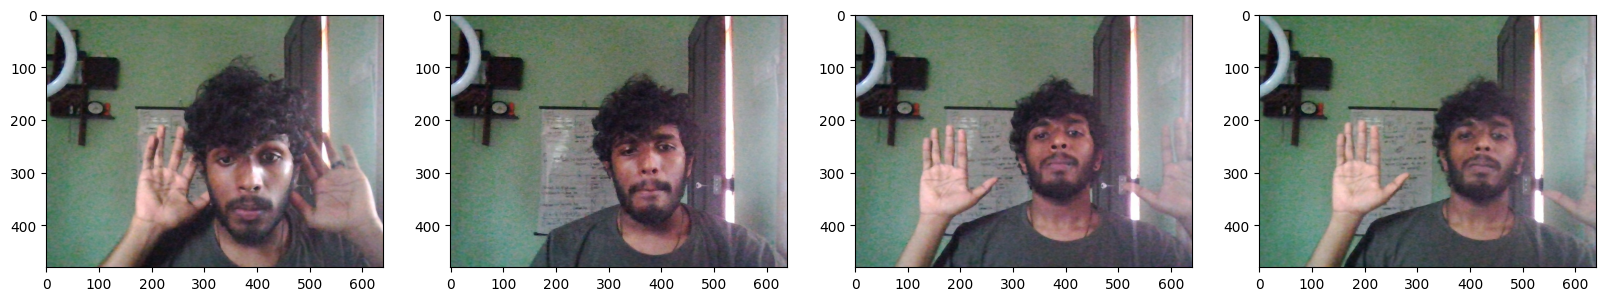

In [12]:
# Create a figure with 4 subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Get the next batch of images as a numpy array
plot_images = image_generator.next()

# Iterate over the images and plot them on each subplot
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)

# Show the plot with the images
plt.show()

### 3. Partition Unaugmented Data

MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [14]:
20*.7 #56 pics into train

14.0

In [15]:
20*.15 #12 to val 12 to test

3.0

### Move the Matching Labels

In [16]:
import os
# Iterate over the folders ['train', 'test', 'val']
for folder in ['train', 'test', 'val']:
    # Iterate over the files in the 'images' folder of each folder
    for file in os.listdir(os.path.join('data', folder, 'images')):
        # Extract the filename without the extension
        filename = file.split('.')[0] + '.json'
        
        # Set the existing filepath of the label file
        existing_filepath = os.path.join('data', 'labels', filename)
        
        # Check if the label file exists
        if os.path.exists(existing_filepath):
            # Set the new filepath in the specific folder
            new_filepath = os.path.join('data', folder, 'labels', filename)
            
            # Replace the existing label file with the new filepath
            os.replace(existing_filepath, new_filepath)

### Apply Image Augmentation on Images and Labels using Albumentations

Setup Albumentations Transform Pipeline

In [2]:
%pip install albumentations

Note: you may need to restart the kernel to use updated packages.


In [18]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### Load a Test Image and Annotation with OpenCV and JSON

In [24]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [19]:

img = cv2.imread(os.path.join('data','train', 'images','0a55f237-f525-11ed-b9fb-9c2f9d6122a8.jpg'))


In [20]:
with open(os.path.join('data', 'train', 'labels', '0a55f237-f525-11ed-b9fb-9c2f9d6122a8.json'), 'r') as f:
    label = json.load(f)

In [21]:
label['shapes'][0]['points']

[[267.2222222222222, 125.41666666666664],
 [436.66666666666663, 315.6944444444444]]

## Extract Coordinates and Rescale to Match Image Resolution

In [22]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [23]:
coords

[267.2222222222222, 125.41666666666664, 436.66666666666663, 315.6944444444444]

In [24]:
# import numpy as np
coords = list(np.divide(coords, [640,480,640,480]))

In [28]:
coords

[0.41753472222222215,
 0.26128472222222215,
 0.6822916666666666,
 0.6576967592592592]

### Apply Augmentations and View Results

In [26]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [29]:
augmented['bboxes'][0][2:]

(0.9192592592592592, 0.6459876543209876)

In [30]:
augmented['bboxes']

[(0.5427160493827159,
  0.22314814814814807,
  0.9192592592592592,
  0.6459876543209876)]

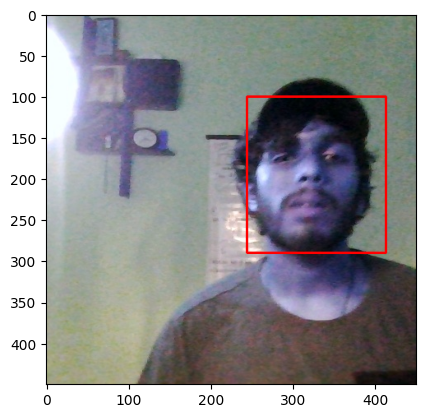

In [31]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

## Build and Run Augmentation Pipeline

#### Run Augmentation Pipeline

In [32]:
for partition in ['train', 'test', 'val']:
    # Iterate over images in the specified partition
    for image in os.listdir(os.path.join('data', partition, 'images')):
        # Read the image
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        # Initialize default coordinates
        coords = [0, 0, 0.00001, 0.00001]

        # Check if a corresponding label file exists
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            # Read the label file
            with open(label_path, 'r') as f:
                label = json.load(f)

            # Update the coordinates with label values
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]

            # Normalize the coordinates
            coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            # Augment the image multiple times
            for x in range(60):
                # Apply augmentation on the image and coordinates
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

                # Save the augmented image
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                # Prepare annotation dictionary
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                # Save the annotation as a JSON file
                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)


### Load Augmented Images to Tensorflow Dataset

In [ ]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [ ]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [ ]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)